In [283]:
#safehaven
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic


In [284]:
df = pd.read_csv("safehaven.csv")
df.tail(13)


,Timestamp,What is your age?,What is your gender?,What is your current marital status?,Do you have access to a smartphone?,Have you ever experienced abuse in your life?,"If yes, what types of abuse have you personally experienced or witnessed? (Check all that apply)",What relationship do you have with your abuser?,Have you sought support or help related to abuse?,"If yes, please specify the type of support you sought (e.g., counseling, legal assistance, community resources)",...,What measures would you like to see implemented in a web application to ensure the safety and privacy of users?,What types of support services would you find most helpful in a web application for individuals experiencing abuse?,"How important is it for a web application to provide access to resources such as hotlines, shelters, counseling services, etc.?",Would you like the option to connect with other individuals who have experienced similar situations through the web application?,How likely are you to use a web application that provides real-time support and guidance for individuals experiencing abuse?,What additional features or functionalities would you like to see in a web application designed to support individuals experiencing abuse?,Do you have any other comments or suggestions for improving a web application aimed at addressing abuse?,Unnamed: 24,Unnamed: 25,Unnamed: 26
14,2024/03/09 10:47:06 AM GMT+3,32,Female,Married,Yes,No,NaN,NaN,No,NaN,...,A strong security system for privacy of victims,Anonymity,Important,Yes,Very Likely,NaN,No,NaN,NaN,NaN
15,2024/03/09 12:49:01 PM GMT+3,36,Female,Married,Yes,Yes,Physical abuse;Emotional/psychological abuse;S...,"As a child, my neighbour, as a young adult, Gu...",Yes,Counselling and therapy,...,Building firewalls and authentication measures.,"Suggesting social support locations, offering ...",Important,Yes,Very Likely,NaN,This project in my opinion if well-planned and...,NaN,NaN,NaN
16,2024/03/09 1:49:11 PM GMT+3,33,Male,Married,Yes,No,Non,Non,No,Non,...,Confidentiality of victims,"Quick response system, by sharing with the vic...",Not Important,Yes,Very Likely,Financial support if necessary.,Ensure running a Pen Testing first before go t...,NaN,NaN,NaN
17,2024/03/09 4:37:40 PM GMT+3,26,Female,Single,Yes,No,Bn,Not applicable,No,Not applicable,...,The security should be topnotch,Educative,Not Important,Yes,Very Likely,Interaction,No,NaN,NaN,NaN
18,2024/03/09 7:03:07 PM GMT+3,33,Female,Married,Yes,No,NaN,No one,No,NaN,...,Privacy should be strictly adhered to,Therapy sessions,Important,Yes,Very Likely,NaN,NaN,NaN,NaN,NaN
19,2024/03/09 8:55:02 PM GMT+3,36,Female,Single,Yes,Yes,Physical abuse;Emotional/psychological abuse;S...,Family member,Yes,Community resource,...,Clear terms and conditions,Free lines for calling,Important,Yes,Very Likely,Availability and activeness of the App,NIL,NaN,NaN,NaN
20,2024/03/12 7:26:04 AM GMT+3,26 years,Female,Single,Yes,No,Witnessing violence,NaN,No,NaN,...,Anonymous,Therapy,Important,Yes,Very Likely,Support group,No,NaN,NaN,NaN
21,2024/03/12 9:31:47 AM GMT+3,29,Female,Single,Yes,Yes,Emotional/psychological abuse,Stranger,No,NaN,...,100% confidentiality,Online Counseling,Important,No,Very Likely,Instant responses,It is a good idea,NaN,NaN,NaN
22,2024/03/12 4:51:27 PM GMT+3,25,Male,Single,Yes,No,NaN,NaN,No,Counselling,...,They should always be informed regarding the u...,No idea,Important,Yes,Very Likely,No idea,No sir/ma,NaN,NaN,NaN
23,2024/03/15 5:51:40 PM GMT+3,37,Female,Married,Yes,Yes,Emotional/psychological abuse,In laws,Yes,Searched for resources online to help with the...,...,Anything that can conceal ones identity,"Counselling, empowerment, accomodation etc.",Important,Yes,Very Likely,No idea,"Take note of our culture,there is alot of sile...",NaN,NaN,NaN


In [285]:
#Extract columns
cols = df.columns
#Create empty list
new_cols = []
#iterate to fix issues with names
for column in cols:
    #to proper case
    proper_cols = column.title()
    #replace space/hyphen with underscore
    proper_cols_hyphen = proper_cols.replace(" ", "_")
    clean_col = proper_cols_hyphen.replace("-", "_")
    #append to empty list
    new_cols.append(clean_col)
#diplay columns
new_cols

#replace existing columns in dataframe with new
df.columns = new_cols

#preview
df.head()

,Timestamp,What_Is_Your_Age?,What_Is_Your_Gender?,What_Is_Your_Current_Marital_Status?,Do_You_Have_Access_To_A_Smartphone?,Have_You_Ever_Experienced_Abuse_In_Your_Life?_,"If_Yes,_What_Types_Of_Abuse_Have_You_Personally_Experienced_Or_Witnessed?_(Check_All_That_Apply)",What_Relationship_Do_You_Have_With_Your_Abuser?,Have_You_Sought_Support_Or_Help_Related_To_Abuse?,"If_Yes,_Please_Specify_The_Type_Of_Support_You_Sought_(E.G.,_Counseling,_Legal_Assistance,_Community_Resources)",...,What_Measures_Would_You_Like_To_See_Implemented_In_A_Web_Application_To_Ensure_The_Safety_And_Privacy_Of_Users?,What_Types_Of_Support_Services_Would_You_Find_Most_Helpful_In_A_Web_Application_For_Individuals_Experiencing_Abuse?,"How_Important_Is_It_For_A_Web_Application_To_Provide_Access_To_Resources_Such_As_Hotlines,_Shelters,_Counseling_Services,_Etc.?",Would_You_Like_The_Option_To_Connect_With_Other_Individuals_Who_Have_Experienced_Similar_Situations_Through_The_Web_Application?,How_Likely_Are_You_To_Use_A_Web_Application_That_Provides_Real_Time_Support_And_Guidance_For_Individuals_Experiencing_Abuse?,What_Additional_Features_Or_Functionalities_Would_You_Like_To_See_In_A_Web_Application_Designed_To_Support_Individuals_Experiencing_Abuse?,Do_You_Have_Any_Other_Comments_Or_Suggestions_For_Improving_A_Web_Application_Aimed_At_Addressing_Abuse?,Unnamed:_24,Unnamed:_25,Unnamed:_26
0,2024/03/06 2:02:41 PM GMT+3,NaN,Female,Single,Yes,No,NaN,NaN,No,NaN,...,NaN,"Medical help, therapy",Important,Yes,Very Likely,Messaging,No comments yet,Important,No,Knowing who to trust
1,2024/03/07 2:31:22 PM GMT+3,30,Female,Married,Yes,Yes,Sexual abuse,Family member,No,Nil,...,Security and anonymity,Counseling and friendship,Important,Yes,Very Likely,Nil,No,NaN,NaN,NaN
2,2024/03/07 8:06:15 PM GMT+3,23,Female,Single,Yes,Yes,Emotional/psychological abuse,Stranger,No,No,...,Talking to like one counselor,Calls emergency contacts,Important,Yes,Very Likely,Testimonials,Not yet,NaN,NaN,NaN
3,2024/03/07 8:39:16 PM GMT+3,31,Female,Married,Yes,Yes,Witnessing violence,Stranger,No,NIL,...,NIL,Depending on the form of abuse,Important,Yes,Very Likely,NIL,NIL,NaN,NaN,NaN
4,2024/03/07 10:02:26 PM GMT+3,36,Female,Single,Yes,Yes,Emotional/psychological abuse,Intimate partner,Yes,Legal,...,Data encryption and high privacy policy,Counselling,Important,No,Not Likely,Can't say,NaN,NaN,NaN,NaN


In [286]:
df = df.rename(columns={
    'Timestamp': 'Timestamp',
    'What_Is_Your_Age?': 'Age',
    'What_Is_Your_Gender?': 'Gender',
    'What_Is_Your_Current_Marital_Status?': 'Marital_Status',
    'Do_You_Have_Access_To_A_Smartphone?': 'Smartphone_Access',
    'Have_You_Ever_Experienced_Abuse_In_Your_Life?_': 'Experienced_Abuse',
    'If_Yes,_What_Types_Of_Abuse_Have_You_Personally_Experienced_Or_Witnessed?_(Check_All_That_Apply)': 'Types_of_Abuse_Felt_Seen',
    'What_Relationship_Do_You_Have_With_Your_Abuser?': 'Abuser_Relationship',
    'Have_You_Sought_Support_Or_Help_Related_To_Abuse?': 'Sought_Abuse_Support',
    'If_Yes,_Please_Specify_The_Type_Of_Support_You_Sought_(E.G.,_Counseling,_Legal_Assistance,_Community_Resources)': 'Type_of_Support_Sought',
    'What_Are_The_Biggest_Challenges_You_Face_When_It_Comes_To_Seeking_Help_Or_Support_For_Abuse?': 'Challenges_Facing_Help',
    'What_Strategies_Or_Coping_Mechanisms_Have_Empowered_You_During_Difficult_Times?': 'Empowerment_Strategies',
    'How_Can_Society_Better_Support_Survivors_Of_Abuse?': 'Society_Support_for_Survivors',
    'Do_You_Believe_That_Technology,_Such_As_Web_Applications,_Can_Be_Helpful_In_Addressing_Issues_Related_To_Abuse?': 'Belief_in_Tech_for_Abuse',
    'Have_You_Ever_Used_A_Web_Application_To_Seek_Help_Or_Support_For_Personal_Issues?': 'Used_WebApp_for_Support',
    'What_Features_Or_Functionalities_Would_You_Expect_To_See_In_A_Web_Application_Designed_To_Support_Individuals_Experiencing_Abuse?': 'Expected_WebApp_Features',
    'How_Concerned_Are_You_About_The_Safety_And_Privacy_Of_Using_A_Web_Application_To_Seek_Help_Or_Support_For_Abuse?': 'Safety_Privacy_Concerns_WebApp',
    'What_Measures_Would_You_Like_To_See_Implemented_In_A_Web_Application_To_Ensure_The_Safety_And_Privacy_Of_Users?': 'Safety_Privacy_Measures_WebApp',
    'What_Types_Of_Support_Services_Would_You_Find_Most_Helpful_In_A_Web_Application_For_Individuals_Experiencing_Abuse?': 'Helpful_Support_Services_WebApp',
    'How_Important_Is_It_For_A_Web_Application_To_Provide_Access_To_Resources_Such_As_Hotlines,_Shelters,_Counseling_Services,_Etc.?': 'Importance_of_Access_to_Resources_WebApp',
    'Would_You_Like_The_Option_To_Connect_With_Other_Individuals_Who_Have_Experienced_Similar_Situations_Through_The_Web_Application?': 'Option_to_Connect_with_Others_WebApp',
    'How_Likely_Are_You_To_Use_A_Web_Application_That_Provides_Real_Time_Support_And_Guidance_For_Individuals_Experiencing_Abuse?': 'Likelihood_of_Using_RealTimeSupport_WebApp',
    'What_Additional_Features_Or_Functionalities_Would_You_Like_To_See_In_A_Web_Application_Designed_To_Support_Individuals_Experiencing_Abuse?': 'Additional_Features_Desired_WebApp',
    'Do_You_Have_Any_Other_Comments_Or_Suggestions_For_Improving_A_Web_Application_Aimed_At_Addressing_Abuse?': 'Other_Comments_for_Improvement_WebApp'
})
df.head()

,Timestamp,Age,Gender,Marital_Status,Smartphone_Access,Experienced_Abuse,Types_of_Abuse_Felt_Seen,Abuser_Relationship,Sought_Abuse_Support,Type_of_Support_Sought,...,Safety_Privacy_Measures_WebApp,Helpful_Support_Services_WebApp,Importance_of_Access_to_Resources_WebApp,Option_to_Connect_with_Others_WebApp,Likelihood_of_Using_RealTimeSupport_WebApp,Additional_Features_Desired_WebApp,Other_Comments_for_Improvement_WebApp,Unnamed:_24,Unnamed:_25,Unnamed:_26
0,2024/03/06 2:02:41 PM GMT+3,NaN,Female,Single,Yes,No,NaN,NaN,No,NaN,...,NaN,"Medical help, therapy",Important,Yes,Very Likely,Messaging,No comments yet,Important,No,Knowing who to trust
1,2024/03/07 2:31:22 PM GMT+3,30,Female,Married,Yes,Yes,Sexual abuse,Family member,No,Nil,...,Security and anonymity,Counseling and friendship,Important,Yes,Very Likely,Nil,No,NaN,NaN,NaN
2,2024/03/07 8:06:15 PM GMT+3,23,Female,Single,Yes,Yes,Emotional/psychological abuse,Stranger,No,No,...,Talking to like one counselor,Calls emergency contacts,Important,Yes,Very Likely,Testimonials,Not yet,NaN,NaN,NaN
3,2024/03/07 8:39:16 PM GMT+3,31,Female,Married,Yes,Yes,Witnessing violence,Stranger,No,NIL,...,NIL,Depending on the form of abuse,Important,Yes,Very Likely,NIL,NIL,NaN,NaN,NaN
4,2024/03/07 10:02:26 PM GMT+3,36,Female,Single,Yes,Yes,Emotional/psychological abuse,Intimate partner,Yes,Legal,...,Data encryption and high privacy policy,Counselling,Important,No,Not Likely,Can't say,NaN,NaN,NaN,NaN


In [287]:
# Remove white spaces from all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [288]:

# Replace NaN values in 'Types_of_Abuse_Felt_Seen' column with 'None'
df['Types_of_Abuse_Felt_Seen'] = df['Types_of_Abuse_Felt_Seen'].fillna('None')

df['Type_of_Support_Sought'] = df['Type_of_Support_Sought'].replace(['Counselling'], 'Counseling')

df['Type_of_Support_Sought'] = df['Type_of_Support_Sought'].replace(['Counselling and therapy'], 'Counseling and therapy')


df['Age'] = df['Age'].replace(['26 years'], 26)

# Define the list of values to be replaced
values_to_replace = ['No', 'Non', 'Not applicable', 'Nil', 'NIL', np.nan, 'N/a']

# Replace the values in the Type_of_Support_Sought column with 'None'
df['Type_of_Support_Sought'] = df['Type_of_Support_Sought'].replace(values_to_replace, 'None')

# Define the list of values to be replaced
values = ['No one', 'Non', 'Not applicable', np.nan]

# Replace the values in the Abuser_Relationshi' column with 'None'
df['Abuser_Relationship'] = df['Abuser_Relationship'].replace(values, 'None')

# Replace other specified values like 'Non' and 'Bn' with 'None'
df['Types_of_Abuse_Felt_Seen'] = np.where(df['Types_of_Abuse_Felt_Seen'] == 'Non', 'None', df['Types_of_Abuse_Felt_Seen'])
df['Types_of_Abuse_Felt_Seen'] = np.where(df['Types_of_Abuse_Felt_Seen'] == 'Bn', 'None', df['Types_of_Abuse_Felt_Seen'])


# Create a mask to filter rows with the specified string in 'Abuser_Relationship'
mask = df['Abuser_Relationship'].str.contains("As a child, my neighbour, as a young adult, Guardian as a married adult, husband", case=False, na=False)

# Replace the values using loc
df.loc[mask, 'Abuser_Relationship'] = 'Neighbor, Guardian, Husband'


In [289]:
columns_to_drop = ['Timestamp', 'Unnamed:_24', 'Unnamed:_25', 'Unnamed:_26']
df = df.drop(columns_to_drop, axis=1)


In [290]:
#Dropping the missing or null values
print(df.isnull().sum())

Age                                           1
Gender                                        0
Marital_Status                                0
Smartphone_Access                             0
Experienced_Abuse                             0
Types_of_Abuse_Felt_Seen                      0
Abuser_Relationship                           0
Sought_Abuse_Support                          0
Type_of_Support_Sought                        0
Challenges_Facing_Help                        6
Empowerment_Strategies                        3
Society_Support_for_Survivors                 2
Belief_in_Tech_for_Abuse                      0
Used_WebApp_for_Support                       1
Expected_WebApp_Features                      0
Safety_Privacy_Concerns_WebApp                0
Safety_Privacy_Measures_WebApp                1
Helpful_Support_Services_WebApp               0
Importance_of_Access_to_Resources_WebApp      0
Option_to_Connect_with_Others_WebApp          0
Likelihood_of_Using_RealTimeSupport_WebA

In [291]:
df_filled = df.fillna(method='bfill')
print(df_filled.isnull().sum())

Age                                           0
Gender                                        0
Marital_Status                                0
Smartphone_Access                             0
Experienced_Abuse                             0
Types_of_Abuse_Felt_Seen                      0
Abuser_Relationship                           0
Sought_Abuse_Support                          0
Type_of_Support_Sought                        0
Challenges_Facing_Help                        0
Empowerment_Strategies                        0
Society_Support_for_Survivors                 0
Belief_in_Tech_for_Abuse                      0
Used_WebApp_for_Support                       0
Expected_WebApp_Features                      0
Safety_Privacy_Concerns_WebApp                0
Safety_Privacy_Measures_WebApp                0
Helpful_Support_Services_WebApp               0
Importance_of_Access_to_Resources_WebApp      0
Option_to_Connect_with_Others_WebApp          0
Likelihood_of_Using_RealTimeSupport_WebA

In [292]:

df = df_filled.fillna(method='ffill')
print(df.isnull().sum())



Age                                           0
Gender                                        0
Marital_Status                                0
Smartphone_Access                             0
Experienced_Abuse                             0
Types_of_Abuse_Felt_Seen                      0
Abuser_Relationship                           0
Sought_Abuse_Support                          0
Type_of_Support_Sought                        0
Challenges_Facing_Help                        0
Empowerment_Strategies                        0
Society_Support_for_Survivors                 0
Belief_in_Tech_for_Abuse                      0
Used_WebApp_for_Support                       0
Expected_WebApp_Features                      0
Safety_Privacy_Concerns_WebApp                0
Safety_Privacy_Measures_WebApp                0
Helpful_Support_Services_WebApp               0
Importance_of_Access_to_Resources_WebApp      0
Option_to_Connect_with_Others_WebApp          0
Likelihood_of_Using_RealTimeSupport_WebA

In [293]:

df['Age'] = df['Age'].astype(int) 

In [294]:
df.dtypes


Age                                            int32
Gender                                        object
Marital_Status                                object
Smartphone_Access                             object
Experienced_Abuse                             object
Types_of_Abuse_Felt_Seen                      object
Abuser_Relationship                           object
Sought_Abuse_Support                          object
Type_of_Support_Sought                        object
Challenges_Facing_Help                        object
Empowerment_Strategies                        object
Society_Support_for_Survivors                 object
Belief_in_Tech_for_Abuse                      object
Used_WebApp_for_Support                       object
Expected_WebApp_Features                      object
Safety_Privacy_Concerns_WebApp                object
Safety_Privacy_Measures_WebApp                object
Helpful_Support_Services_WebApp               object
Importance_of_Access_to_Resources_WebApp      

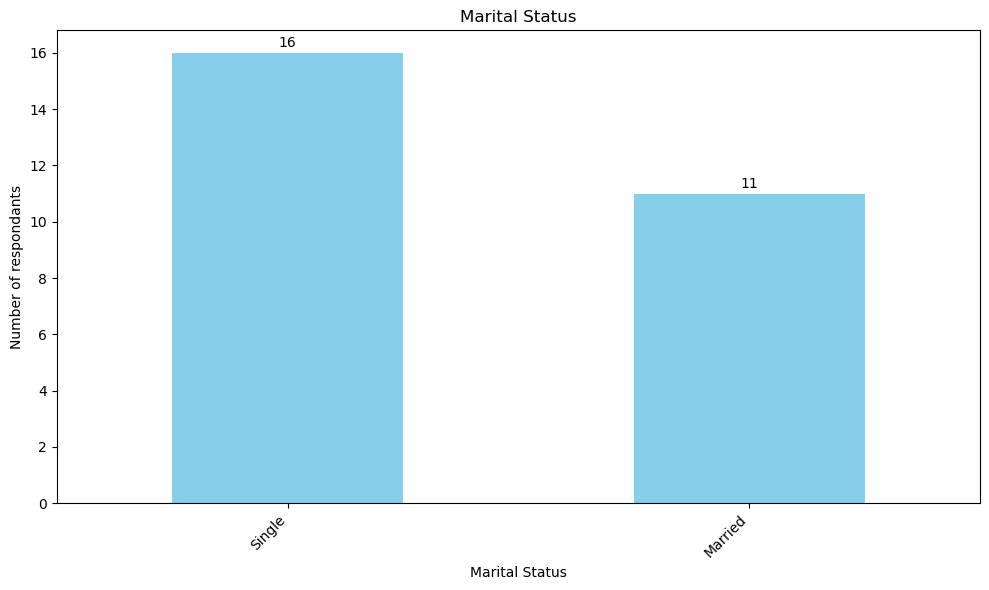

In [295]:
# Count the occurrences of each marital status
marital_status_counts = df['Marital_Status'].value_counts()

# Plot the counts of marital status
plt.figure(figsize=(10, 6))
marital_status_counts.plot(kind='bar', color='skyblue')
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of respondants')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Adding annotation for each bar
for i, count in enumerate(marital_status_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()


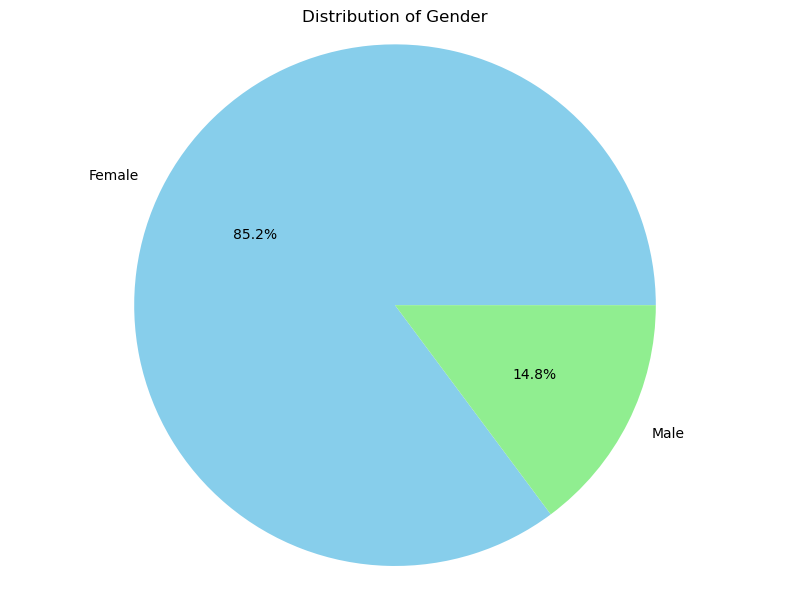

In [296]:
# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Plot the counts of gender as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

plt.show()


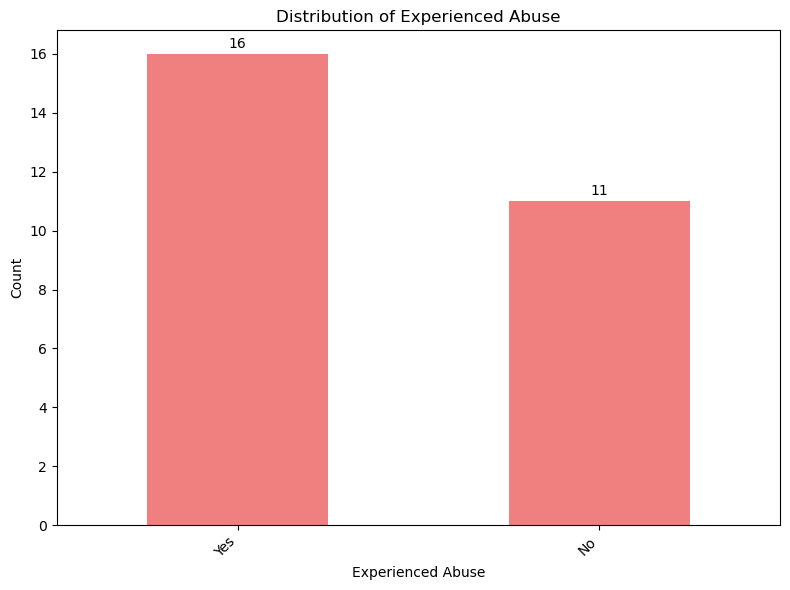

In [297]:
# Count the occurrences of each response in 'Experienced_Abuse'
abuse_counts = df['Experienced_Abuse'].value_counts()

# Plot the counts of experienced abuse
plt.figure(figsize=(8, 6))
abuse_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Experienced Abuse')
plt.xlabel('Experienced Abuse')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()

# Adding annotation for each bar
for i, count in enumerate(abuse_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()


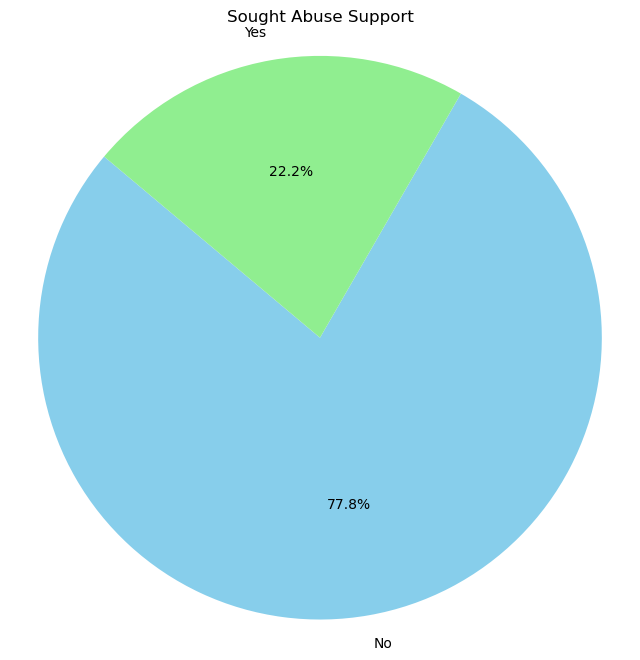

In [298]:
# Count the occurrences of each response in the 'Sought_Abuse_Support' column
support_counts = df['Sought_Abuse_Support'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(support_counts, labels=support_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Sought Abuse Support')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [299]:
df['Abuser_Relationship'] = df['Abuser_Relationship'].astype(str)

# Split the responses into individual categories and create a new DataFrame
split_df = df['Abuser_Relationship'].str.split(', ', expand=True)

# Stack the DataFrame to convert it into a Series
stacked = split_df.stack()

# Replace 'Intimate partner' and 'Husband' with 'Intimate partner/Husband'
stacked = stacked.replace({
    'Intimate partner': 'Intimate partner/Husband',
    'Husband': 'Intimate partner/Husband'
})

# Count the occurrences of each category
category_counts = stacked.value_counts()

# Print the counts
print(category_counts)

None                        9
Family member               5
Stranger                    5
Intimate partner/Husband    3
Friend                      3
Neighbor                    2
Guardian                    1
In laws                     1
Name: count, dtype: int64


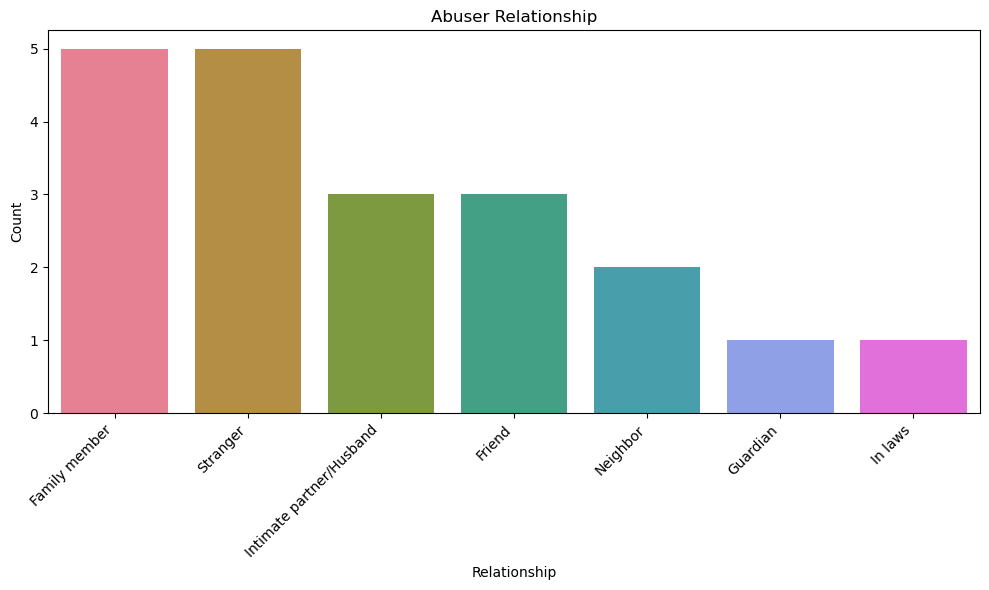

In [300]:
# Exclude 'None' from the category counts
category_counts = category_counts[category_counts.index != 'None']

# Plot a bar graph with each bar having a different color
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='husl')
plt.title('Abuser Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

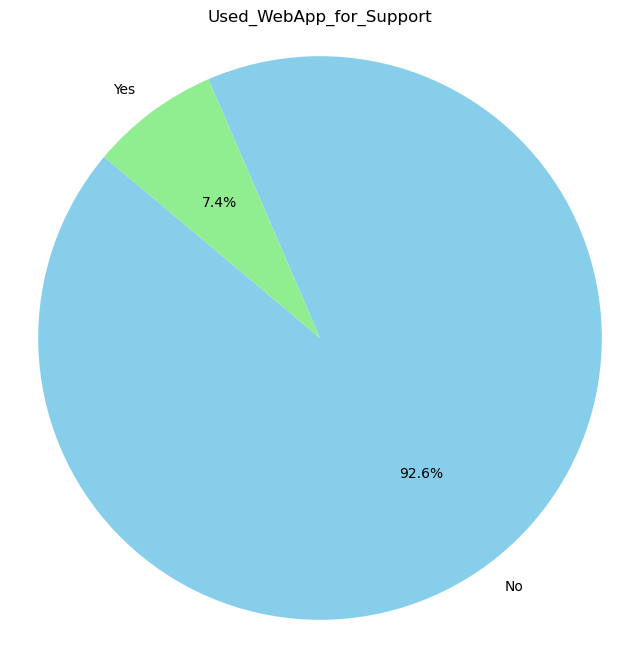

In [301]:
# Count the occurrences of each response in the 'Sought_Abuse_Support' column
support_counts = df['Used_WebApp_for_Support'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(support_counts, labels=support_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Used_WebApp_for_Support')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


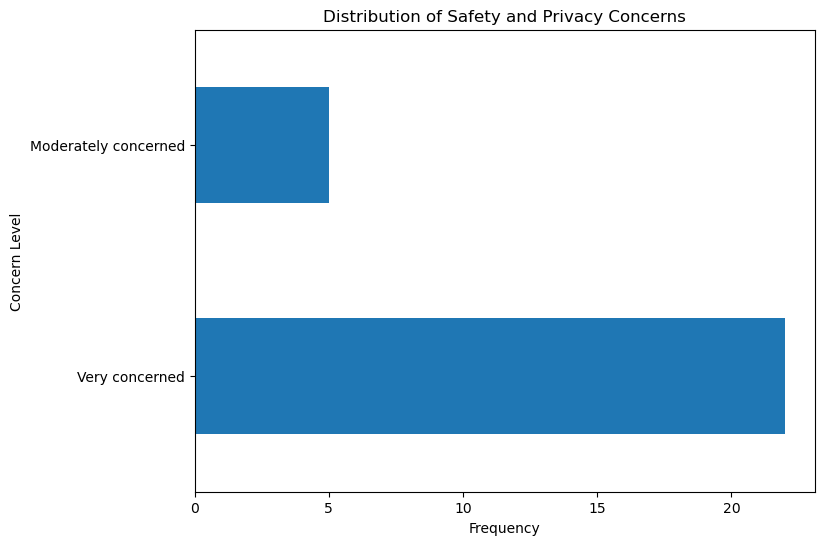

In [302]:
# Replace longer names with shorter ones
df['Safety_Privacy_Concerns_WebApp'] = df['Safety_Privacy_Concerns_WebApp'].replace({
    'Very concerned about the security of ones details': 'Very concerned',
    'Moderately concerned about the security of ones details': 'Moderately concerned'
})

# Plot the frequency distribution with shorter names in horizontal bars
plt.figure(figsize=(8, 6))
df['Safety_Privacy_Concerns_WebApp'].value_counts().plot(kind='barh')
plt.title('Distribution of Safety and Privacy Concerns')
plt.xlabel('Frequency')
plt.ylabel('Concern Level')
plt.show()


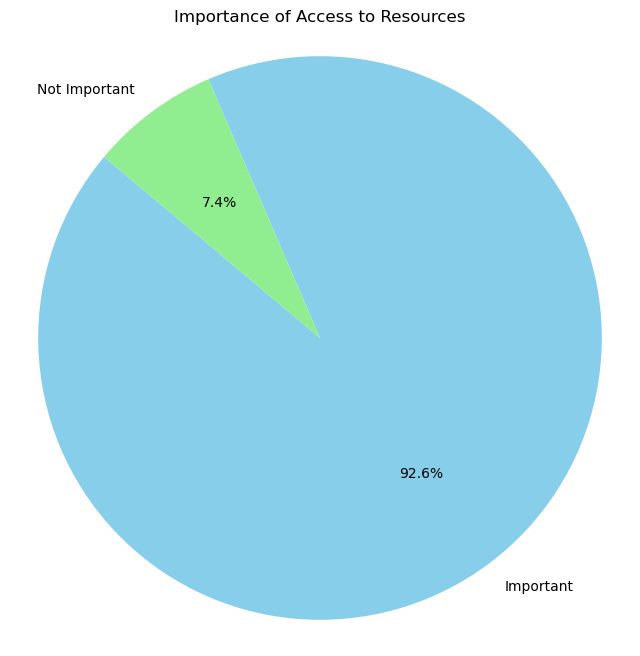

In [303]:
# Assuming df is your DataFrame containing the data
import matplotlib.pyplot as plt

# Get the frequency distribution of the column
expected_counts = df['Importance_of_Access_to_Resources_WebApp'].value_counts()

# Plot the frequency distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(expected_counts, labels=expected_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Importance of Access to Resources')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


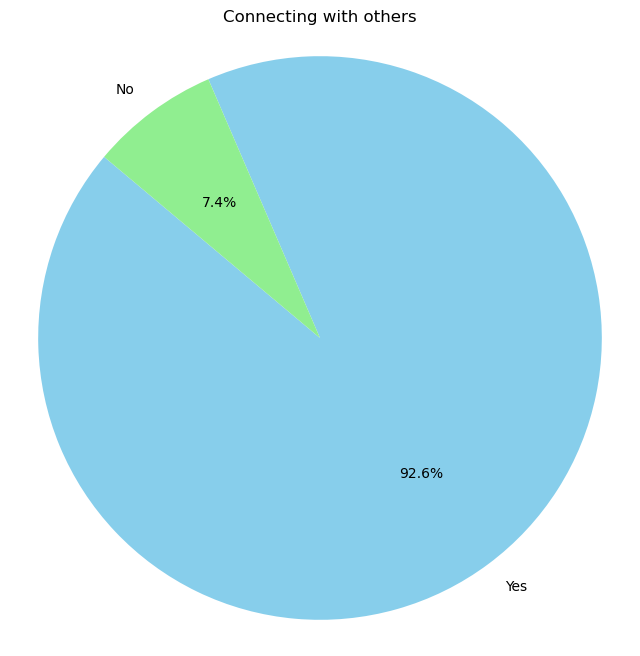

In [304]:

# Assuming df is your DataFrame containing the data
expected_counts = df['Option_to_Connect_with_Others_WebApp'].value_counts()

# Plot the frequency distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(expected_counts, labels=expected_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Connecting with others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

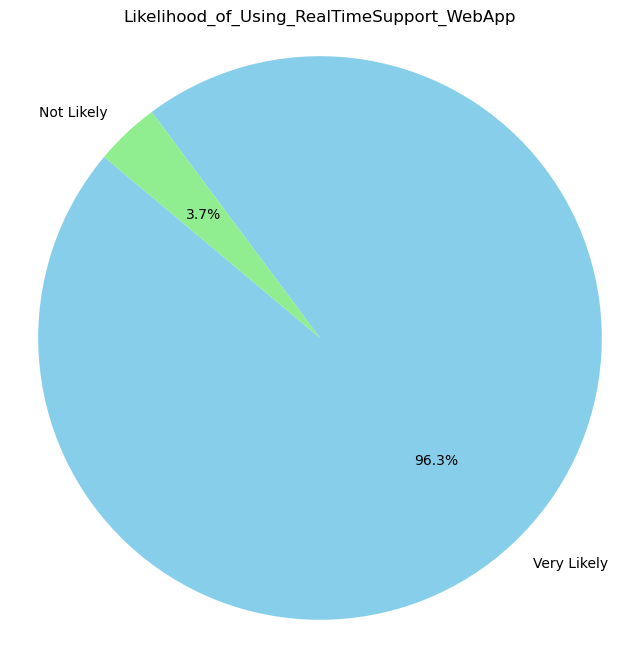

In [305]:


# Assuming df is your DataFrame containing the data
expected_counts = df['Likelihood_of_Using_RealTimeSupport_WebApp'].value_counts()

# Plot the frequency distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(expected_counts, labels=expected_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Likelihood_of_Using_RealTimeSupport_WebApp')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [306]:
Abuse_Types = df['Types_of_Abuse_Felt_Seen'].str.split(';',expand=True)

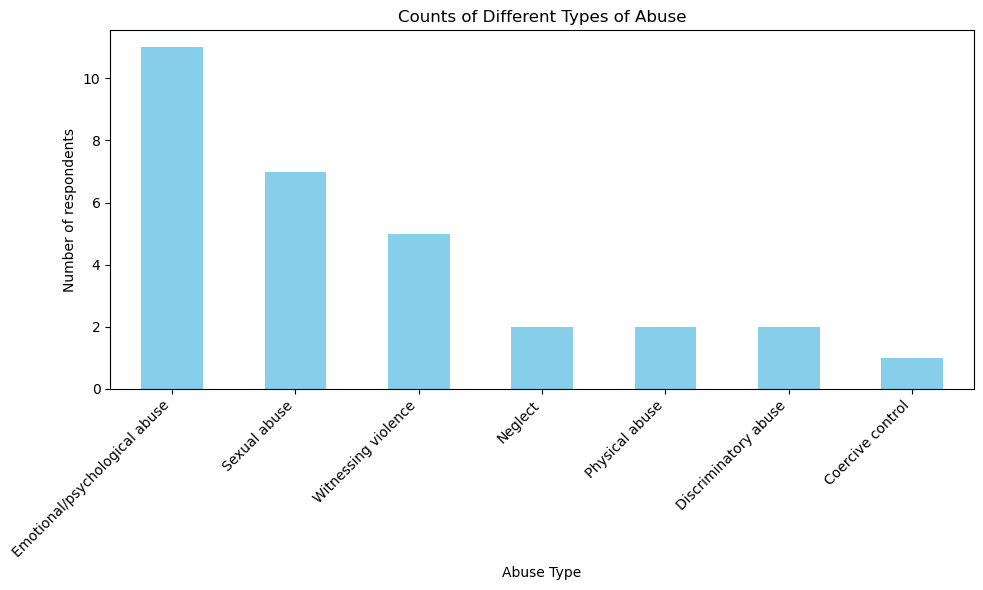

In [307]:
import matplotlib.pyplot as plt


# Filter out 'None' values
Abuse_Types_filtered = Abuse_Types.apply(lambda row: row[row != 'None'], axis=1)

# Count occurrences of each abuse type
abuse_type_counts = Abuse_Types_filtered.stack().value_counts()


# Plot the counts without the "None" category
plt.figure(figsize=(10, 6))
abuse_type_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Different Types of Abuse')
plt.xlabel('Abuse Type')
plt.ylabel('Number of respondents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [308]:
df['Helpful_Support_Services_WebApp'].value_counts()

Helpful_Support_Services_WebApp
Counseling                                                                                                                      2
Medical help, therapy                                                                                                           1
Suggesting social support locations, offering skills acquisition centres as most victims are dependent on their abusers.        1
Causelling                                                                                                                      1
Answer that emergency call and save lives                                                                                       1
Counselling, empowerment, accomodation etc.                                                                                     1
No idea                                                                                                                         1
Online Counseling                                         

In [310]:
# Function to categorize the responses into topics
def categorize_topic(response):
    response = response.lower()
    if 'counseling' in response or 'therapy' in response:
        return 'Counseling Services'
    elif 'medical' in response or 'quick response' in response:
        return 'Medical Support'
    elif 'support' in response or 'skills acquisition' in response or 'family' in response:
        return 'Social Support'
    elif 'emergency' in response or 'speed dial' in response:
        return 'Emergency Services'
    elif 'anonymity' in response or 'educative' in response or 'no idea' in response or 'na' in response:
        return 'Anonymity and Education'
    else:
        return 'Other'

# Apply the function to create a new column indicating the topic for each response
df2 = df['Helpful_Support_Services_WebApp'].apply(categorize_topic)

# Print the DataFrame with the topic column
print(df2)

0         Counseling Services
1         Counseling Services
2          Emergency Services
3                       Other
4                       Other
5     Anonymity and Education
6                       Other
7         Counseling Services
8         Counseling Services
9         Counseling Services
10                      Other
11             Social Support
12    Anonymity and Education
13                      Other
14    Anonymity and Education
15             Social Support
16            Medical Support
17    Anonymity and Education
18        Counseling Services
19                      Other
20        Counseling Services
21        Counseling Services
22    Anonymity and Education
23                      Other
24         Emergency Services
25                      Other
26                      Other
Name: Helpful_Support_Services_WebApp, dtype: object
